# Before starting working on problems please disable AI assistant as it will solve the problems for you :)
# To do so:

* Go to settings (gear icon in top right corner) -> AI Assistance
* Select "Hide generative AI features"

In [ ]:
!pip install matplotlib numpy  # Install all necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Markov Chain

In this task you will implement missing method `run` for the `MarkovChain` class. This class represents a generic Markov chain with an initial state `0` and a transition matrix `_matrix` defining transition probabilities between states (i.e. $P(X_{t+1}=j | X_t=i) = \text{_matrix}[i, j]$). Method `run` should simulate the Markov chain for a given number of steps and return the sequence of visited states.

**Algorithm (Monte Carlo):**

1. Choose an initial state $X_0$, or `initial_state`.

2. For $t = 0,1,\dots,$`steps-1`:

   a. Let $i = X_t$ be the current state.

   b. Draw $U = \mathrm{Uniform}(0,1)$.

   c. Move to the unique $j$ such that $U \in \big(\sum_{k < j} \text{_matrix}[i, k],\, \sum_{k \le j} \text{_matrix}[i, k]\big]$.

*Hint:* instead of doing the cumulative-sum selection by hand (2c), you can also use [`numpy.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to sample the next state from row $i$ of the transition matrix.

In [ ]:
from typing import List


class MarkovChain:
    def __init__(self, matrix: List[List[float]]):
        self._matrix = matrix

    def run(self, steps: int, initial_state: int = 0) -> List[int]:
        # TODO: your code here
        return []


chain = MarkovChain([[1.0]])
assert chain.run(5) == [0, 0, 0, 0, 0, 0]

chain = MarkovChain([[0.0, 1.0], [1.0, 0.0]])
assert chain.run(6) == [0, 1, 0, 1, 0, 1, 0]

chain = MarkovChain([[0.0, 0.1, 0.9], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
count_1, count_2 = 0, 0
for _ in range(1000):
    result = chain.run(2)
    if result[1] == 1:
        count_1 += 1
    else:
        count_2 += 1
assert 70 < count_1 < 130
assert 850 < count_2 < 950

chain = MarkovChain([[0.5, 0.5], [0.5, 0.5]])
count_0, count_1 = 0, 0
for _ in range(1000):
    result = chain.run(10)
    if result[-1] == 0:
        count_0 += 1
    else:
        count_1 += 1
assert 400 < count_0 < 600
assert 400 < count_1 < 600



# Guess the Chain

In this task you will be given a black-box Markov chain represented by the `MarkovChain` class. Your goal is to estimate its transition matrix by running the chain multiple times and collecting statistics.

*Hint:* you can do it with the Monte Carlo method. When you run the chain and see $x_t = i$ and $x_{t + 1} = j$ this is basically a sample from the distribution $P(X_{t + 1} | X_t = i)$, so you can use a number of such samples to estimate the probabilities.

In [ ]:
def guess_transition_matrix(
    chain: MarkovChain,
    state_count: int,
    runs: int,
    steps_per_run: int
) -> List[List[float]]:
    # TODO: your code here
    return [[0.0 for _ in range(state_count)] for _ in range(state_count)]


def check_matrices_equal(
    mat1: List[List[float]],
    mat2: List[List[float]],
    tol: float = 3e-2
) -> bool:
    n = len(mat1)
    m = len(mat1[0])
    if n != len(mat2) or m != len(mat2[0]):
        return False
    for i in range(n):
        for j in range(m):
            if abs(mat1[i][j] - mat2[i][j]) > tol:
                return False
    return True

MATRICES = [
    [[1.0]],
    [[0.0, 1.0], [1.0, 0.0]],
    [[0.0, 0.1, 0.9], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],
    [[0.5, 0.5], [0.5, 0.5]],
    [[0.3, 0.5, 0.2], [0.1, 0.6, 0.3], [0.4, 0.4, 0.2]],
    [[0.2, 0.2, 0.6], [0.3, 0.4, 0.3], [0.5, 0.3, 0.2]],
]

for matrix in MATRICES:
    chain = MarkovChain(matrix)
    guessed_matrix = guess_transition_matrix(chain, len(matrix), runs=10000, steps_per_run=10)
    assert check_matrices_equal(matrix, guessed_matrix), f"Failed for matrix: {matrix}"

# Two Steps Forward

In this problem you are given a Markov chain with known transition matrix and known initial state which is the state `0`. Your goal is to compute the distribution of the state after two steps. You need to do it analytically, i.e. not by simulating the chain and using Monte Carlo methods.

*Hint:* express the two-step transition probabilities in terms of the one-step transition matrix from the lecture (i.e. use the matrix $P^2$). You may also find [`numpy.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) useful for matrix multiplication.

In [ ]:
def get_state_distribution_after_two_steps(
    matrix: List[List[float]],
    initial_state: int = 0
) -> List[float]:
    # If matrix is of size N x N, this function should return a list of length N
    # where the i-th element is the probability of being in state i after taking two
    # steps starting from the state `initial_state`.

    # TODO: your code here
    return [0.0 for _ in range(len(matrix))]


def run_test(
    matrix: List[List[float]],
    expected: List[float],
):
    distribution = get_state_distribution_after_two_steps(matrix, 0)
    assert len(distribution) == len(expected)

    for i in range(len(distribution)):
        assert abs(distribution[i] - expected[i]) < 1e-3


run_test([[1.0]], [1.0])
run_test([[0.5, 0.5], [0.5, 0.5]], [0.5, 0.5])
run_test([
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, 1.0]],
    [0.0, 0.0, 1.0],
)
run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    [0.3, 0.15, 0.33, 0.22],
)

# $k$-steps Forward

In previous task, you have found the distribution of the Markov chain state after taking 2 steps. Let's generalize this result and find the distribution after $k$ steps where $k$ is a provided parameter.

Hint: simply use the formula for $n$-step transition probabilities iteratively, $k - 1$ times.

In [ ]:
def get_state_distribution_after_k_steps(
    matrix: List[List[float]],
    steps: int,
    initial_state: int = 0
) -> List[float]:
    # If matrix is of size N x N, this function should return a list of length N
    # where the i-th element is the probability of being in state i after taking `steps`
    # steps starting from the state `initial_state`.

    # TODO: your code here
    return [0.0 for _ in range(len(matrix))]


def run_test(
    matrix: List[List[float]],
    k: int,
    expected: List[float],
):
    distribution = get_state_distribution_after_k_steps(matrix, k, 0)
    assert len(distribution) == len(expected)

    for i in range(len(distribution)):
        assert abs(distribution[i] - expected[i]) < 1e-3


run_test([[1.0]], 1, [1.0])
for k in [1, 2, 5]:
    run_test([[0.5, 0.5], [0.5, 0.5]], k, [0.5, 0.5])

forward_matrix = [
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, 1.0],
]
run_test(forward_matrix, 0, [1.0, 0.0, 0.0])
run_test(forward_matrix, 1, [0.0, 1.0, 0.0])
run_test(forward_matrix, 2, [0.0, 0.0, 1.0])
run_test(forward_matrix, 10, [0.0, 0.0, 1.0])

run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    3,
    [0.234, 0.189, 0.354, 0.223],
)
run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    8,
    [0.2571231, 0.19387407, 0.34543317, 0.20356966],
)

# [BONUS] Long Journey

This problem is the same as above but now $k$ may be very large (up to $10^{10}$), so simply iterating the one-step update $k$ times will be too slow. You need to find a more efficient way! Check the spoiler for hints.

<details>
<summary>Spoiler 1!</summary>

To compute $P^k$ efficiently for large $k$, you can use the method of [exponentiation by squaring](https://en.wikipedia.org/wiki/Exponentiation_by_squaring).
</details>

In [ ]:
def get_state_distribution_after_k_steps(
    matrix: List[List[float]],
    steps: int,
    initial_state: int = 0
) -> List[float]:
    # If matrix is of size N x N, this function should return a list of length N
    # where the i-th element is the probability of being in state i after taking two
    # steps starting from the state `initial_state`.

    # TODO: your code here
    return [0.0 for _ in range(len(matrix))]


def run_test(
    matrix: List[List[float]],
    k: int,
    expected: List[float],
):
    distribution = get_state_distribution_after_k_steps(matrix, k, 0)
    assert len(distribution) == len(expected)

    for i in range(len(distribution)):
        assert abs(distribution[i] - expected[i]) < 1e-3


run_test([[1.0]], 1, [1.0])
for k in [1, 2, 5]:
    run_test([[0.5, 0.5], [0.5, 0.5]], k, [0.5, 0.5])

forward_matrix = [
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, 1.0],
]
run_test(forward_matrix, 0, [1.0, 0.0, 0.0])
run_test(forward_matrix, 1, [0.0, 1.0, 0.0])
run_test(forward_matrix, 2, [0.0, 0.0, 1.0])
run_test(forward_matrix, 10, [0.0, 0.0, 1.0])

run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    3,
    [0.234, 0.189, 0.354, 0.223],
)
run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    8,
    [0.2571231, 0.19387407, 0.34543317, 0.20356966],
)
run_test([
    [0.0, 1.0],
    [1.0, 0.0]],
    10**10,
    [1.0, 0.0],
)
run_test([
    [0.0, 1.0],
    [1.0, 0.0]],
    10**10 - 1,
    [0.0, 1.0],
)
run_test([
    [0.1, 0.2, 0.3, 0.4],
    [0.7, 0.2, 0.0, 0.1],
    [0.1, 0.3, 0.6, 0.0],
    [0.3, 0.0, 0.3, 0.4]],
    10**10,
    [0.2570225057633353, 0.19382025024776098, 0.3455056634851391, 0.2036517122168502],
)

N = 37
matrix = [[0.0 for _ in range(N)] for _ in range(N)]
for i in range(N):
    matrix[i][(i + 1) % N] = 1.0
for k in [10**5, 10**6, 10**7, 10**8, 10**9, 10**10, 10**10 - 1, 10**10 - 2]:
    expected = [0.0 for _ in range(N)]
    expected[k % N] = 1.0
    run_test(matrix, k, expected)


---

# 2. Hidden Markov Model (HMM)

In the next two problems you will try to bring to light occasionally dishonest casino that was discussed in the lecture.

As a reminder, the occasionally dishonest casino has two type of dice: fair and biased (or loaded). The fair die has equal probabilities for all faces, while the biased one has higher probability for rolling 6 rather than other faces. You do not know which die is used at each step, but you can observe the outcomes of the rolls. After each roll, there is a probability that the casino will switch to the other die.

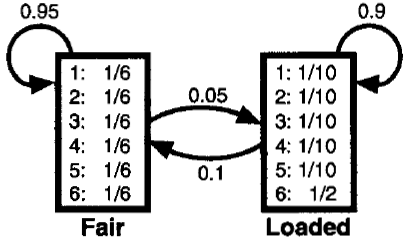

In first two problems you will be given the probabilities of all events in the casino as well as the sequence of observed rolls. Your goal is to find the most likely sequence of hidden states (i.e., which die was used at each step) with the help of Viterbi algorithm.

In [ ]:
from dataclasses import dataclass


@dataclass
class HiddenMarkovModel:
    # Number of (hidden) states.
    # States are numbered from 0 to state_count - 1.
    state_count: int
    # Number of possible observations.
    # Observations are numbered from 0 to observation_count - 1.
    observation_count: int

    # i-th element is the probability of starting in state i.
    start_probability: List[float]
    # Element (i, j) is the probability of going into state j from state i.
    # Formally, this is P(X_{t + 1} = j | X_t = i).
    transition_probability: List[List[float]]
    # Element (i, j) is the probability of the emission of the
    # observation j in the state i.
    # Formally, this is P(Y_t = j | X_t = i).
    emission_probability: List[List[float]]


casino = HiddenMarkovModel(
    # States are 0: Fair die, 1: Loaded die.
    state_count=2,
    # Observations are die rolls 1 to 6.
    observation_count=6,
    # High probability of starting with the fair die.
    start_probability=[0.9, 0.1],
    # High probability of staying with the same die.
    transition_probability=[
        [0.95, 0.05],
        [0.10, 0.90],
    ],
    # Fair die is uniform, loaded die favors 6.
    emission_probability=[
        [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],  # Fair die
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.5],  # Loaded die
    ],
)

# Casino: Viterbi Score

In this problem you will implement the Viterbi algorithm to find the most likely sequence of hidden states (i.e., which die was used at each step) given the observed sequence of rolls. For now, you will only compute the probability of the most likely sequence, without reconstructing the sequence itself (which will be done in the next problem).

Let's formally define our Hidden Markov Model (HMM). HMM consists of:
* A set of $n$ hidden states (in our case, $n = 2$ corresponding to fair and biased dice). States are indexed from `0` to `n - 1` where `n` is defined in `state_count` field of `HiddenMarkovModel` class.
* A set of observations (in our case, possible outcomes of dice rolls, i.e., numbers from `1` to `6`). Observations are indexed from `0` to `m - 1` where `m` is defined in `observation_count` field of `HiddenMarkovModel` class.
* An initial state distribution $\pi$ where $\pi_i$ is the probability that the initial state is `i`. This distribution is defined in `initial_distribution` field of `HiddenMarkovModel` class. In our case, we assume that the casino starts with the fair die with the probability `0.9`.
* A state transition matrix $A$ where $A_{i, j}$ is the probability of transitioning from state `i` to state `j`. This matrix is defined in `transition_matrix` field of `HiddenMarkovModel` class.
* An emission matrix $B$ where $B_{i, o}$ is the probability of observing `o` when in state `i`. This matrix is defined in `emission_matrix` field of `HiddenMarkovModel` class.

When Markov chain is run, it starts in some initial state according to the initial distribution $\pi$. At each time step, it emits an observation according to the emission probabilities of the current state and then transitions to the next state according to the transition probabilities similarly to regular Markov chains.

A run of length $r$ can be described by the sequence of hidden states $Z_0, Z_1, \ldots, Z_{r - 1}$ (that are unknown) and the sequence of observations $X_0, X_1, \ldots, X_{r - 1}$ (that are visible). Note, that during state $r$ HMM both emits observation $X_{r - 1}$ and transitions to the state $X_r$, but $X_r$ does not affect any observations and thus can be ignored.

In this problem you are given a sequence of observations $X_0, X_1, \ldots, X_{r - 1}$ and your goal is to compute the probability of the most likely sequence of hidden states $Z_0, Z_1, \ldots, Z_{r - 1}$ that could have generated these observations. In terms of casino problem, you are given the sequence of rolls and your goal is to find the probability of the most likely sequence of dice (fair or biased) that could have produced these rolls.

The very natural way to start working on an optimization problem is to formalize the objective function (in our case, probability). Since in the HMM all events are independent, the score of given $X$-sequence is just a product of many probabilities:
$$
P(Z_0, Z_1, \ldots, Z_{r - 1}\;|\;X_0, X_1, \ldots, X_{r - 1}) = \pi_{Z_0} \cdot \prod_{t = 1}^{r - 1} A_{Z_{t - 1}, Z_t} \cdot \prod_{t = 0}^{r - 1} B_{Z_t, X_t}
$$

It is always nice to work with sums instead of products, so let's maximize the logarithm of this probability instead:
$$
\log P(Z_0, Z_1, \ldots, Z_{r - 1}\;|\;X_0, X_1, \ldots, X_{r - 1}) = \log \pi_{Z_0} + \sum_{t = 1}^{r - 1} \log A_{Z_{t - 1}, Z_t} + \sum_{t = 0}^{r - 1} \log B_{Z_t, X_t}
$$

To maximize $\log P$ we will use [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming) technique. This method is very general and the core idea is to reduce "larger" instances of a problem to "smaller" ones. In our case we will compute a matrix
$$
dp_{i, j} = \max_{Z_0, Z_1, \ldots, Z_{i - 2}} \log P(Z_0, Z_1, \ldots, Z_{i - 2}, X_{i - 1} = j\;|\;X_0, X_1, \ldots, X_{i - 1})
$$

While this expression may look scary, let's break it down. Here $dp_{i, j}$ is the best sequence of hidden states given first `i` observations and the last hidden state is `j`.

Can you see where the answer to the original problem is located in this matrix?

<details>
<summary>Spoiler!</summary>

The maximum log-probability is just maximum value of $dp_{r - 1, j}$ for all possible last states `j`.
To get the actual probability, you need to exponentiate this value.
</details>

Dynamic programming approach reduces subproblems into a smaller ones, so we will try to express $dp_{i, j}$ through $dp_{i - 1, *}$. Let's consider the last step of the sequence. Before reaching state `j` at time `i`, we must have been in some state `k` at time `i - 1` which corresponds to $dp_{i - 1, k}$. That is,
$$
dp_{i, j} = \max_k \left[ dp_{i - 1, k} + \log A_{k, j} + \log B_{j, X_{i - 1}} \right]
$$
<details>
<summary>Or (more formally and provably)</summary>

$$
\begin{aligned}
dp_{i, j} &= \max_{Z_0, Z_1, \ldots, Z_{i - 2}} \left[\log P(Z_0, Z_1, \ldots, Z_{i - 2}, Z_{i - 1} = j\;|\;X_0, X_1, \ldots, X_{i - 1})\right] \\
&= \max_{Z_0, Z_1, \ldots, Z_{i - 2}, Z_{i - 1} = j} \left[\log \pi_{Z_0} + \sum_{t = 1}^{i - 1} \log A_{Z_{t - 1}, Z_t} + \sum_{t = 0}^{i - 1} \log B_{Z_t, X_t}\right] \\
&= \max_{Z_0, Z_1, \ldots, Z_{i - 2}, Z_{i - 1} = j} \left[\log \pi_{Z_0} + \sum_{t = 1}^{i - 2} \log A_{Z_{t - 1}, Z_t} + \sum_{t = 0}^{i - 2} \log B_{Z_t, X_t} + \log A_{Z_{i - 2}, Z_{i - 1}} + \log B_{Z_{i - 1}, X_{i - 1}}\right] \\
&= \max_{k}\left[\max_{Z_0, Z_1, \ldots, Z_{i - 2} = k, Z_{i - 1} = j} \left[\log \pi_{Z_0} + \sum_{t = 1}^{i - 2} \log A_{Z_{t - 1}, Z_t} + \sum_{t = 0}^{i - 2} \log B_{Z_t, X_t} + \log A_{Z_{i - 2}, Z_{i - 1}} + \log B_{Z_{i - 1}, X_{i - 1}}\right]\right] \\
&= \max_{k}\left[\max_{Z_0, Z_1, \ldots, Z_{i - 2} = k} \left[\log \pi_{Z_0} + \sum_{t = 1}^{i - 2} \log A_{Z_{t - 1}, Z_t} + \sum_{t = 0}^{i - 2} \log B_{Z_t, X_t}\right] + \log A_{k, j} + \log B_{j, X_{i - 1}}\right] \\
&= \max_{k} \left[ dp_{i - 1, k} + \log A_{k, j} + \log B_{j, X_{i - 1}} \right]
\end{aligned}
$$
</details>
Also, we need to initialize the first row of the matrix (i.e., when `i = 0`) which is pretty straightforward:
$$
dp_{0, j} = \log \pi_j + \log B_{j, X_0}
$$

Now, with all the pieces in place, you can implement the Viterbi algorithm in `viterbi_probability`. Note, that the function should return logarithm of the maximum probability, not the probability itself.

In [ ]:
def viterbi_score(
    model: HiddenMarkovModel,
    observations: List[int],
) -> float:
    # TODO: your code here
    return 0.0

def run_test(
    observations: List[int],
    expected: float,
):
    probability = viterbi_score(casino, observations)
    assert abs(probability - expected) < 1e-3

run_test([0, 1, 2, 3, 4, 5], -11.112383802963906)
run_test([5, 5, 5, 5, 5, 5], -6.988270754642848)
run_test([5] * 100, -82.04799419911342)
run_test([1] * 100, -184.35934358283106)
run_test(
    [0, 0, 1, 0, 2, 5, 0, 5, 5, 5, 5, 0, 2, 2, 1, 4, 1, 3, 4, 1, 5, 4, 0, 2, 5, 5, 5, 3, 3, 5, 5, 0, 4, 4, 5, 1, 5, 4, 0, 3, 2, 5, 0, 2, 4, 4, 4, 2, 4, 5, 3, 4, 0, 4, 5, 2, 2, 5, 3, 2, 5, 3, 0, 2, 4, 1, 5, 0, 0, 0, 5, 5, 0, 4, 5, 5, 2, 5, 5, 4, 2, 3, 1, 5, 5, 3, 2, 3, 5, 5, 3, 5, 3, 3, 5, 5, 3, 1, 4, 5],
    -181.6643699177372,
)
run_test(
    [4, 4, 1, 3, 3, 2, 5, 4, 1, 2, 3, 1, 2, 2, 4, 2, 2, 2, 2, 0, 5, 3, 0, 0, 4, 0, 0, 1, 1, 1, 4, 5, 4, 5, 2, 4, 1, 2, 3, 2, 0, 3, 2, 1, 0, 4, 0, 5, 0, 5, 3, 4, 0, 0, 1, 4, 5, 5, 1, 2, 1, 2, 5, 5, 2, 1, 2, 2, 4, 4, 1, 0, 1, 4, 2, 3, 3, 2, 5, 3, 5, 1, 0, 1, 2, 0, 0, 5, 0, 0, 4, 1, 5, 5, 1, 5, 3, 5, 2, 0, 5, 2, 3, 0, 1, 4, 5, 4, 5, 3, 0, 4, 3, 3, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 4, 4, 3, 1, 3, 4, 4, 1, 3, 4, 5, 3, 5, 5, 0, 3, 3, 4, 5, 5, 5, 3, 5, 3, 5, 5, 5, 2, 4, 5, 5, 0, 5, 5, 5, 5, 0, 5, 3, 5, 4, 5, 4, 0, 3, 0, 5, 5, 4, 5, 4, 1, 4, 4, 0, 1, 3, 4, 2, 3, 0, 5, 0, 1, 3, 1, 5, 0, 5, 5, 4, 4, 1, 4, 2, 1],
    -360.99436322879507,
)

# Casino 2: Viterbi Sequence

In previous task you found the maximum possible score of the hidden state sequence $Z_0, Z_1, \ldots, Z_{r - 1}$ given the observation sequence $X_0, X_1, \ldots X_{r - 1}$. In this task you will recover the sequence $Z_0, Z_1, \ldots, Z_{r - 1}$ itself.

This can be done recursively. Given the matrix $dp$, you can find $Z_{r - 1}$ it is just $\max_x dp_{r - 1, x}$. To find $Z_{r - 2}$ remember that $dp_{r - 1, x}$ was computed as $dp_{r - 1, x} = \max_k \left[dp_{r - 2, k} + \ldots \right]$. The $k$ producing the maximum value of the sum is $Z_{r - 1}$. Now you can apply the sequence retrieval algorithm recursively to $dp_{r - 2, k}$ to get the full sequence.

Implementation hint: you can either store the best $k$ for each $dp_{i, j}$ in a separate matrix during the forward pass or compute it on the fly during the sequence retrieval. For this problem both approaches are fine.

Note that it is possible that there are multiple hidden state sequences
that maximize the probability. You can return any of these.


In [ ]:
def viterbi(
    model: HiddenMarkovModel,
    observations: List[int],
) -> List[int]:
    # TODO: your code here
    return [0 for _ in range(len(observations))]

In [ ]:
import math


def run_test(
    observations: List[int],
    expected: float,
):
    states = viterbi(casino, observations)
    log_prob = math.log(casino.start_probability[states[0]])
    for i in range(len(observations)):
        if i + 1 < len(states):
            log_prob += math.log(casino.transition_probability[states[i]][states[i + 1]])
        log_prob += math.log(casino.emission_probability[states[i]][observations[i]])
    assert abs(log_prob - expected) < 1e-3

run_test([0, 1, 2, 3, 4, 5], -11.112383802963906)
run_test([5, 5, 5, 5, 5, 5], -6.988270754642848)
run_test([5] * 100, -82.04799419911342)
run_test([1] * 100, -184.35934358283106)
run_test(
    [0, 0, 1, 0, 2, 5, 0, 5, 5, 5, 5, 0, 2, 2, 1, 4, 1, 3, 4, 1, 5, 4, 0, 2, 5, 5, 5, 3, 3, 5, 5, 0, 4, 4, 5, 1, 5, 4, 0, 3, 2, 5, 0, 2, 4, 4, 4, 2, 4, 5, 3, 4, 0, 4, 5, 2, 2, 5, 3, 2, 5, 3, 0, 2, 4, 1, 5, 0, 0, 0, 5, 5, 0, 4, 5, 5, 2, 5, 5, 4, 2, 3, 1, 5, 5, 3, 2, 3, 5, 5, 3, 5, 3, 3, 5, 5, 3, 1, 4, 5],
    -181.6643699177372,
)
run_test(
    [4, 4, 1, 3, 3, 2, 5, 4, 1, 2, 3, 1, 2, 2, 4, 2, 2, 2, 2, 0, 5, 3, 0, 0, 4, 0, 0, 1, 1, 1, 4, 5, 4, 5, 2, 4, 1, 2, 3, 2, 0, 3, 2, 1, 0, 4, 0, 5, 0, 5, 3, 4, 0, 0, 1, 4, 5, 5, 1, 2, 1, 2, 5, 5, 2, 1, 2, 2, 4, 4, 1, 0, 1, 4, 2, 3, 3, 2, 5, 3, 5, 1, 0, 1, 2, 0, 0, 5, 0, 0, 4, 1, 5, 5, 1, 5, 3, 5, 2, 0, 5, 2, 3, 0, 1, 4, 5, 4, 5, 3, 0, 4, 3, 3, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 4, 4, 3, 1, 3, 4, 4, 1, 3, 4, 5, 3, 5, 5, 0, 3, 3, 4, 5, 5, 5, 3, 5, 3, 5, 5, 5, 2, 4, 5, 5, 0, 5, 5, 5, 5, 0, 5, 3, 5, 4, 5, 4, 0, 3, 0, 5, 5, 4, 5, 4, 1, 4, 4, 0, 1, 3, 4, 2, 3, 0, 5, 0, 1, 3, 1, 5, 0, 5, 5, 4, 4, 1, 4, 2, 1],
    -360.99436322879507,
)